<a href="https://colab.research.google.com/github/Harmokay/my-python-learning-journey/blob/main/Workshop_7%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

## P 7.1: Download the adult_T7 dataset from Canvas. Use four classifiers to predict the 'income' column. Calculate all evaluation metrics using a five-fold cross-validation. Print the feature importance values from the random forest classifier. You should improve your models as best as you can (10%).

In [ ]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)  ####################




## P 7.2: Use two clustering methods to cluster a numerical column in the dataset. Find the optimum number of clusters using the elbow method (5%).  

## NOTE: Please complete this task in the next week's workshop
## NOTE: You can use any aptional numerical column for this task.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving adult_T7.csv to adult_T7.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
df= pd.read_csv('adult_T7.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [17]:
#CHOOSE A COLUMN TO CLUSTER
col_to_cluster = pd.DataFrame(df['hours-per-week'])

In [15]:
#CHECKING FOR MISSING VALUES IN THE COLUMN
df.isna().sum()

,0
age,0
workclass,175
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,175
relationship,0
race,0
sex,0


In [12]:
df['hours-per-week'].describe()

,hours-per-week
count,10000.000000
mean,40.453900
std,12.328571
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(col_to_cluster)

In [21]:
inertia = []
k_range = range(1, 11)
rs = 42

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

In [22]:
inertia

[9999.999999999905,
 4981.679357582201,
 2030.7487087865713,
 1220.1389544247215,
 895.40586358449,
 587.6345897214218,
 413.83544163074146,
 296.92865460734004,
 233.7637192063371,
 177.3665736123935]

[]

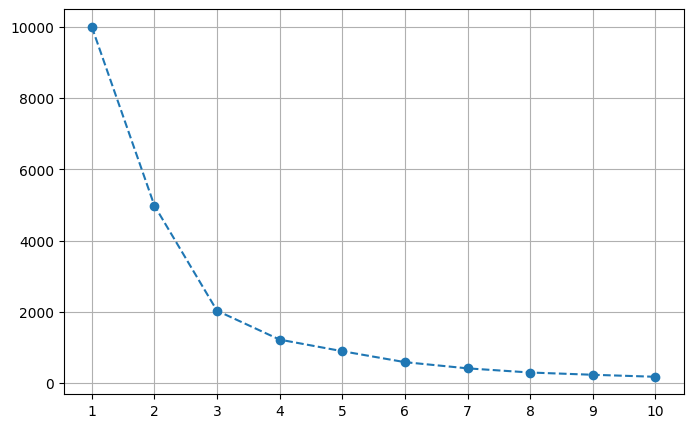

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xticks(k_range)
plt.grid('True')
plt.plot()

In [24]:
kmeans = KMeans(n_clusters=3, random_state=rs, n_init=10)

In [25]:
kmeans_labels = kmeans.fit_predict(data_scaled)

In [26]:
df['Cluster'] = kmeans_labels

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K,0
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K,0
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K,1
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K,0
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,0


In [30]:
df.Cluster.value_counts()

,count
Cluster,
0,7277
1,1624
2,1099


In [32]:
from sklearn.metrics import silhouette_score

In [33]:
kmns_score = silhouette_score(data_scaled, kmeans_labels)
kmns_score

np.float64(0.7050852377453515)

In [34]:
ms = MeanShift()
ms_labels = ms.fit_predict(data_scaled)

In [37]:
df['MS_Cluster'] = ms_labels

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,MS_Cluster
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K,0,0
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K,1,1
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K,3,3
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K,1,1
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,0,0


In [39]:
df.MS_Cluster.value_counts()

,count
MS_Cluster,
0,5100
1,1640
3,1270
2,898
4,752
5,211
6,88
7,41


In [40]:
len(ms.cluster_centers_)

8

In [41]:
ms_score = silhouette_score(data_scaled, ms_labels)
ms_score

np.float64(0.756781696080628)

In [42]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,MS_Cluster
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K,0,0
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K,1,1
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K,3,3
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K,1,1
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,0,0


In [43]:
ms_cluster0 = df[df['MS_Cluster'] == 0]

In [44]:
ms_cluster0.shape

(5100, 17)

In [45]:
ms_cluster0.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Cluster,MS_Cluster
count,5100.000000,5.100000e+03,5100.000000,5100.000000,5100.000000,5100.000000,5100.0,5100.0
mean,38.662549,1.918201e+05,9.912353,743.619804,80.854314,40.030196,0.0,0.0
std,12.563159,1.046393e+05,2.482803,5431.287085,387.817982,0.791868,0.0,0.0
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,37.000000,0.0,0.0
25%,29.000000,1.194192e+05,9.000000,0.000000,0.000000,40.000000,0.0,0.0
50%,37.000000,1.813265e+05,10.000000,0.000000,0.000000,40.000000,0.0,0.0
75%,47.000000,2.373260e+05,11.000000,0.000000,0.000000,40.000000,0.0,0.0
max,90.000000,1.210504e+06,16.000000,99999.000000,3770.000000,44.000000,0.0,0.0
